# Appendix

## Source code for the plot in problem 5

In [2]:
import matplotlib.pyplot as plt
import numpy as np

exp = np.arange(-2, 4, dtype=float)

mantissa = np.array([1., 5/4, 3/2, 7/4])

values = []
for M in mantissa:
    values.append(M * np.power(2, exp))
    
normalized = np.concatenate(values)
normalized

array([ 0.25  ,  0.5   ,  1.    ,  2.    ,  4.    ,  8.    ,  0.3125,
        0.625 ,  1.25  ,  2.5   ,  5.    , 10.    ,  0.375 ,  0.75  ,
        1.5   ,  3.    ,  6.    , 12.    ,  0.4375,  0.875 ,  1.75  ,
        3.5   ,  7.    , 14.    ])

In [3]:
f = mantissa - 1
denormalized = f * (2 ** -2)
denormalized

array([0.    , 0.0625, 0.125 , 0.1875])

In [6]:
numbers = np.concatenate([normalized, denormalized])
numbers.sort()
numbers = np.concatenate([np.flip(-numbers), numbers])
numbers

array([-14.    , -12.    , -10.    ,  -8.    ,  -7.    ,  -6.    ,
        -5.    ,  -4.    ,  -3.5   ,  -3.    ,  -2.5   ,  -2.    ,
        -1.75  ,  -1.5   ,  -1.25  ,  -1.    ,  -0.875 ,  -0.75  ,
        -0.625 ,  -0.5   ,  -0.4375,  -0.375 ,  -0.3125,  -0.25  ,
        -0.1875,  -0.125 ,  -0.0625,  -0.    ,   0.    ,   0.0625,
         0.125 ,   0.1875,   0.25  ,   0.3125,   0.375 ,   0.4375,
         0.5   ,   0.625 ,   0.75  ,   0.875 ,   1.    ,   1.25  ,
         1.5   ,   1.75  ,   2.    ,   2.5   ,   3.    ,   3.5   ,
         4.    ,   5.    ,   6.    ,   7.    ,   8.    ,  10.    ,
        12.    ,  14.    ])

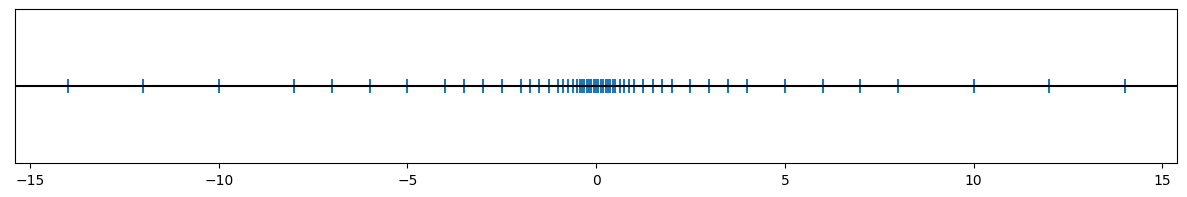

In [5]:
plt.figure(figsize=(15, 2))
plt.scatter(x = numbers, y = np.zeros_like(numbers), s=100, marker="|")
plt.yticks([])
plt.axhline(0, color="black")
plt.show()

## Verification of Overflow and Underflow in SP and DP

Here, I used the estimated machine epsilon from problem 1.

$$\epsilon_{SP} = \text{1.19209e-07}$$

$$\epsilon_{DP} = \text{2.22045e-16}$$


```cpp
#include <iostream>
#include <cmath>

int main()
{
    float Vf = std::powf(2, 104) * (std::powf(2, 24) - 1);
    float vf = -Vf;
    float nvf = std::powf(2, -126);
    float epsf = 1.19209e-07f;

    std::cout << "Largest float V = " << Vf << std::endl;
    std::cout << "Smallest float v = " << vf << "\n\n";

    std::cout << "Overflow\n";

    std::cout << "V + (2^102 * (2 - eps)) = "
              << Vf + (std::powf(2, 102) * (2.0f - epsf)) << "\n\n";
    std::cout << "V + 2^103 = " << Vf + (std::powf(2, 102) * 2.0f) << "\n\n";

    std::cout << "v - (2^102 * (2 - eps)) = "
              << vf - (std::powf(2, 102) * (2.0f - epsf)) << "\n\n";
    std::cout << "v - 2^103 = " << vf - (std::powf(2, 102) * 2.0f) << "\n\n";

    std::cout << "Underflow\n";

    std::cout << "Smallest normal float = " << nvf << "\n\n";
    std::cout << "Smallest normal float - eps = " << nvf - epsf << "\n\n";

    double Vd = std::pow(2, 971) * (std::pow(2, 53) - 1);
    double vd = -Vd;
    double nvd = std::pow(2, -1022);
    double epsd = 2.22045e-16;

    std::cout << "Largest double: " << Vd << std::endl;
    std::cout << "Smallest double: " << vd << "\n\n";

    std::cout << "Overflow\n";
    std::cout << "V + (2^969 * (2 - eps)) = "
              << Vd + (std::pow(2, 969) * (2.0 - epsd)) << "\n\n";
    std::cout << "V + 2^970 = " << Vd + (std::pow(2, 969) * 2.0) << "\n\n";

    std::cout << "v - (2^969 * (2 - eps)) = "
              << vd - (std::pow(2, 969) * (2.0 - epsd)) << "\n\n";
    std::cout << "v - 2^970 = " << vd - (std::pow(2, 969) * 2.0) << "\n\n";

    std::cout << "Underflow\n";
    std::cout << "Smallest normal double = " << nvd << "\n\n";
    std::cout << "Smallest normal double - eps = " << nvd - epsd << "\n\n";

    return 0;
}
```

#### Output

```
Largest float V = 3.40282e+38
Smallest float v = -3.40282e+38

Overflow
V + (2^102 * (2 - eps)) = 3.40282e+38

V + 2^103 = inf

v - (2^102 * (2 - eps)) = -3.40282e+38

v - 2^103 = -inf

Underflow
Smallest positive normal float = 1.17549e-38

Smallest positive normal float - eps = -1.19209e-07

Largest double: 1.79769e+308
Smallest double: -1.79769e+308

Overflow
V + (2^969 * (2 - eps)) = 1.79769e+308

V + 2^970 = inf

v - (2^969 * (2 - eps)) = -1.79769e+308

v - 2^970 = -inf

Underflow
Smallest positive normal double = 2.22507e-308

Smallest positive normal double - eps = -2.22045e-16
```